/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:611: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few tree

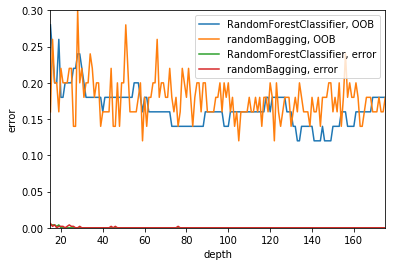

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
import sklearn.linear_model
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing
import scipy.integrate
from sklearn.tree import DecisionTreeClassifier
RANDOM_STATE = 123
#se demora
x, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.1)

ensemble_clfs = [
    ("RandomForestClassifier, OOB",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("randomBagging, OOB",
        BaggingClassifier(oob_score =True) ),
    ("RandomForestClassifier, error",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("randomBagging, error",
        BaggingClassifier(oob_score =True) )
]



error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 15
max_estimators = 175
m = 0

for label, clf in ensemble_clfs:
    d = 10
    for i in range(min_estimators, max_estimators + 1):
        if(m<2):
            clf.set_params(n_estimators = d)
            clf.fit(X_test, Y_test)

            oob_error = 1 - clf.oob_score_
            error_rate[label].append((i, oob_error))
        else:
            clf.set_params(n_estimators = d)
            clf.fit(x, y)

            error = 1-clf.oob_score_
            error_rate[label].append((i, error))
            
        d = d+1
    m = m+1

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.ylim(0, 0.3)
plt.xlabel("depth")
plt.ylabel("error")
plt.legend(loc="upper right")
plt.show()


In [35]:
from numpy.linalg import inv
def f(miu0, miu1, c, x, p):
    part1 = miu0.dot(c)
    part1 = part1.dot(np.transpose(x))

    part2 = miu0.dot(c)
    part2 = part2.dot(np.transpose(miu0))

    f0 = part1 - 0.5*part2 + np.log(p[0])
    part1 = miu1.dot(c)
    part1 = part1.dot(np.transpose(x))
    part2 = miu1.dot(c)
    part2 = part2.dot(np.transpose(miu1))
    f1 = part1 - 0.5*part2 + np.log(p[1])
    if(f0>f1):
        return 0
    else:
        return 1
    
    
def lda(p):
    data = pd.read_csv('OJ.csv')
    default = data['Purchase']
    y = list(default)
    y = np.asarray(y)
    x = data[["WeekofPurchase","StoreID","PriceCH","PriceMM","DiscCH","DiscMM","SpecialCH","SpecialMM","LoyalCH","SalePriceMM","SalePriceCH","PriceDiff"]]
    x = np.asarray(x)
    index0 = []
    index1 = []

        
    for i in range(0, len(y)):
        if(y[i]=='CH'):
            index0.append(i)
            y[i] = 0
        else:
            index1.append(i)
            y[i]=1

    index0 = np.asarray(index0)
    index1 = np.asarray(index1)
    
    
    
    x0 = x[index0]
    x1 = x[index1]

    miu0 = x0.mean(axis=0)
    miu1 = x1.mean(axis=0)

    miu = [(miu0[0]+miu1[0])/2, (miu0[1] + miu1[1])/2]

    for i in range(0,len(x0)):
        x0[i][0] = x0[i][0] - miu[0]
        x0[i][1] = x0[i][1] - miu[1]
    for i in range(0, len(x1)):
        x1[i][0] = x1[i][0] - miu[0]
        x1[i][1] = x1[i][1] - miu[1]   

    c0 = np.transpose(x0).dot(x0)
    c0 = c0/(len(index0))
    c1 = np.transpose(x1).dot(x1)
    c1 = c1/(len(index1))

    c = []


    for i in range(0,len(c0)):
        ca= []
        for j in range(0,12):
            suma = len(index0)*(c0[i][j])+len(index1)*(c1[i][j])
            ca.append(suma/(len(x)))
            
        ca = np.asarray(ca)
        c.append(ca)

    c = np.asarray(c)
    c = inv(c)
      
    predict = []
    #aqui se sacan los predicts
    #se encontro que el lda no comienza a tener los datos correctos cuando se van aumentando los datos.
    for i in range(0,len(x)):
        predict.append(f2(miu0, miu1, c, x[i], p))
    
    error=0
    
    Tp = 0
    Fp = 0
    Tn = 0
    Fn = 0

    for i in range(0, len(default)):
        if(predict[i] == 0):
            if(default[i]== 1):
                Tp+=1
            else:
                Fp+=1
                error= error+1
        else:
            if(default[i]== 0):
                Tn+=1
                error = error+1
            else:
                Fn+=1
                

    error =error/len(y)
    return error
    
def f2(miu0, miu1, c, x, p):
    part1 = miu0.dot(c)
    part1 = part1.dot(np.transpose(x))

    part2 = miu0.dot(c)
    part2 = part2.dot(np.transpose(miu0))

    f0 = part1 - 0.5*part2 + np.log(p[0])
    part1 = miu1.dot(c)
    part1 = part1.dot(np.transpose(x))
    part2 = miu1.dot(c)
    part2 = part2.dot(np.transpose(miu1))
    f1 = part1 - 0.5*part2 + np.log(p[1])
    if(f0>f1):
        return 0
    else:
        return 1
    

data = pd.read_csv('OJ.csv')
default = data['Purchase']
y = list(default)
y = np.asarray(y)
for i in range(0, len(y)):
    if(y[i]=="CH"):
        y[i]=0
    else:
        y[i]=1
x = data[["WeekofPurchase","StoreID","PriceCH","PriceMM","DiscCH","DiscMM","SpecialCH","SpecialMM","LoyalCH","SalePriceMM","SalePriceCH","PriceDiff"]]
x = np.asarray(x)
f = sklearn.linear_model.LogisticRegression()
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.5)

f.fit(X_train, Y_train)
predict = f.predict(X_test)
errorL = 0
for i in range(0,len(predict)):
    if(predict[i]==0):
        if(y[i]==1):
            errorL = errorL+1
    else:
        if(y[i]==0):
            errorL = errorL+1

errorL = errorL/len(y)
print(errorL)

clf = RandomForestClassifier(oob_score=True )
clf.fit(X_train, Y_train)
errorRandom = 1-clf.oob_score_
print(errorRandom)
errorDecision = []
for i in range(1,10):
    clf2 =  DecisionTreeClassifier(max_depth=i)
    clf2.fit(X_train, Y_train)
    predictD = clf2.predict(X_test)
    e = 0
    for i in range(0, len(predictD)):
        if(predictD[i]==0):
            if(y[i]==1):
                e = e+1
        else:
            if(y[i]==0):
                e = e+1
                
    errorDecision.append(e)
print(errorDecision)      
pp = np.linspace(0,1,100)
error = []

for i in range(0,len(pp)):
    ps = [pp[i], 1-pp[i]]
    error.append(lda(ps))
print(error)

/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:118: RuntimeWarning: divide by zero encountered in log


0.0
0.22056074766355138
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0009345794392523365, 0.014018691588785047, 0.027102803738317756, 0.03457943925233645, 0.04953271028037383, 0.06355140186915888, 0.07757009345794393, 0.09813084112149532, 0.12149532710280374, 0.14018691588785046, 0.16261682242990655, 0.17757009345794392, 0.197196261682243, 0.2102803738317757, 0.22710280373831776, 0.24485981308411214, 0.26542056074766357, 0.2822429906542056, 0.297196261682243, 0.3168224299065421, 0.32897196261682243, 0.3401869158878505, 0.3485981308411215, 0.36074766355140186, 0.36822429906542054, 0.37850467289719625, 0.3878504672897196, 0.394392523364486, 0.40654205607476634, 0.411214953271028, 0.41682242990654206, 0.42990654205607476, 0.4383177570093458, 0.4504672897196262, 0.46261682242990654, 0.47102803738317756, 0.48317757009345796, 0.48317757009345796, 0.4953271028037383, 0.5112149532710281, 0.5158878504672897, 0.5261682242990654, 0.5401869158878505, 0.5514018691588785, 0.56448598130841

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:123: RuntimeWarning: divide by zero encountered in log
